In [1]:
import sys
sys.path.extend(['/home/quic/QUIC-Projects'])

import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
DATA_DIR = Path('/home/quic/QUIC-Projects/summary_ipynb/2021/10 October/15 Fri/Exp3(ZZ64)')
OBJ_FUNC = r'$\mathcal{L}_{\phi, \lambda}$'

In [2]:
# plt.style.use(['science', 'nature', 'no-latex'])
plt.style.use('./styles/figstyle.mplstyle')
plt.style.reload_library()

In [4]:
from pandas import read_csv, DataFrame
data = read_csv(DATA_DIR/'sample_summary.csv')
"""
def clean_pivot(df, agg_func='mean'):
    temp = df.pivot_table(values=list(df.columns[4:]), index=list(df.columns[0:4]), aggfunc=agg_func)
    return DataFrame(columns=list(temp.index.names)+list(temp.columns), data=np.hstack([np.asarray(list(temp.index)), temp.to_numpy()]))
for m in ['mean', 'median', 'std', 'min', 'max']:
    clean_pivot(data, m).to_csv(DATA_DIR / f'summary({m}).csv', index=False)
"""

X = np.load(DATA_DIR/'Dataset #0/X.npy')
Xt = np.load(DATA_DIR/'Dataset #0/Xt.npy')
y = np.load(DATA_DIR/'Dataset #0/y.npy')
yt = np.load(DATA_DIR/'Dataset #0/yt.npy')

In [31]:
"""
from itertools import product
min_select_result = DataFrame(columns=data.columns)
for cid, ly in product(range(1, 20), range(1, 9)):
    min_val = min(data.loc[(data['circuit_id']==cid) & (data['layer']==ly)]['last_cost_avg'])
    data_df = data.loc[(data['circuit_id']==cid) & (data['layer']==ly)]
    min_select_result = min_select_result.append(data_df.loc[data_df['last_cost_avg']==min_val], ignore_index=True)
"""
min_select_result = read_csv(DATA_DIR /'summary(mean).csv')
min_select_result.loc[min_select_result['circuit_id']==15]
    

,dataset,circuit_id,layer,num_params,accuracy,entcap,expr,last_cost_avg,num_iter
112,0.0,15.0,1.0,6.0,0.936667,0.684749,0.595484,0.103565,73.125
113,0.0,15.0,2.0,12.0,0.925000,0.744999,0.206790,0.100400,84.625
114,0.0,15.0,3.0,18.0,0.922500,0.874581,0.098024,0.106761,81.625
115,0.0,15.0,4.0,24.0,0.936667,0.892990,0.061656,0.099068,88.875
116,0.0,15.0,5.0,30.0,0.944167,0.922066,0.057937,0.093292,86.125
117,0.0,15.0,6.0,36.0,0.890833,0.927737,0.054387,0.101967,67.875
118,0.0,15.0,7.0,42.0,0.944167,0.935730,0.042875,0.092813,89.125
119,0.0,15.0,8.0,48.0,0.891667,0.936492,0.062366,0.097220,77.625


In [32]:
data.loc[(data['circuit_id']==15) & (data['layer']==3)]

,dataset,circuit_id,layer,num_params,expr,entcap,num_iter,last_cost_avg,accuracy
912,0,15,3,18,0.090140,0.875693,60,0.095116,0.913333
913,0,15,3,18,0.081982,0.876521,88,0.113560,0.940000
914,0,15,3,18,0.113736,0.877500,102,0.138767,0.926667
915,0,15,3,18,0.065492,0.872360,79,0.092155,0.913333
916,0,15,3,18,0.097189,0.872754,94,0.101410,0.986667
917,0,15,3,18,0.095258,0.875718,82,0.095203,0.973333
918,0,15,3,18,0.086190,0.871833,53,0.122639,0.813333
919,0,15,3,18,0.154210,0.874271,95,0.095234,0.913333


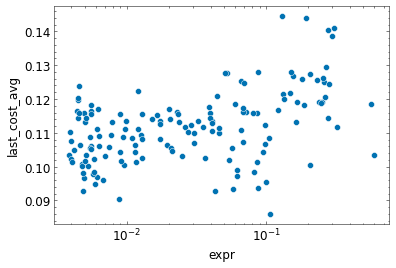

In [33]:
%matplotlib inline
import seaborn as sns
sns.scatterplot(data=min_select_result, x='expr', y='last_cost_avg')
# sns.scatterplot(data=min_select_result.loc[(min_select_result['expr']>0.07) & (min_select_result['expr']<0.1) & (min_select_result['last_cost_avg']<1)], x='expr', y='last_cost_avg', hue='layer', style='circuit_id')
plt.xscale('log')

In [52]:
# mask = (svm.predict(Xt)==yt)
# data.loc[(data['circuit_id']==15) & (data['layer']==4)]    
import json
# with open(DATA_DIR / 'Samples/Circuit #15/layer=5/1/full_result.json', 'r') as f:
with open(DATA_DIR / 'Dataset #0/Circuit #9/layer=2/7/full_result.json', 'r') as f:
    f_vector = json.load(f)['f']

mask = (f_vector * (2*yt-1) > 0)

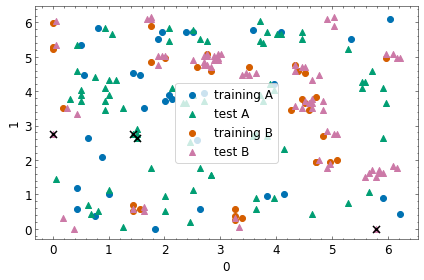

In [53]:

%matplotlib inline

ax = plt.subplot(111)

e1, e2 = 0, 1
default_size = plt.rcParams['lines.markersize']

ax.scatter(X[y==0, e1], X[y==0, e2], marker='o', label='training A')
ax.scatter(Xt[yt==0, e1], Xt[yt==0, e2], marker='^', label='test A')
ax.scatter(X[y!=0, e1], X[y!=0, e2], marker='o', label='training B')
ax.scatter(Xt[yt!=0, e1], Xt[yt!=0, e2], marker='^', label='test B')

ax.scatter(Xt[~mask, e1], Xt[~mask, e2], marker='x', color='k', s=50)

ax.legend()
ax.set_xlabel(e1)
ax.set_ylabel(e2)
plt.tight_layout()
# fig.savefig('./figs/iris_class.png')
plt.show()

In [20]:
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
c15_yb = c3 = color_list[3]
c15_nb = color_list[2]
psd_yb = c1 = color_list[0]
psd_nb = color_list[1]
c2= color_list[5]

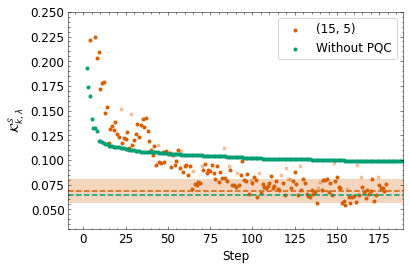

In [12]:
%matplotlib inline

"""
_tmp_path = DATA_DIR / 'Classical'
_tmp_path.mkdir(exist_ok=True)
pqasvm.save(_tmp_path / 'qasvm')
storage.save(_tmp_path / 'storage')
"""
import dill
with open(DATA_DIR / 'Classical' / 'storage', 'rb') as f:
#with open(DATA_DIR / 'Classical' / 'storage_blocking', 'rb') as f:
    storage = dill.load(f)
with open(DATA_DIR / 'Classical' / 'qasvm', 'rb') as f:
#with open(DATA_DIR / 'Classical' / 'qasvm_blocking', 'rb') as f:
    pqasvm = dill.load(f)
last_cost = storage.last_cost_avg(16, ignore_rejected=True)


# with open(DATA_DIR / 'Samples/Circuit #15/layer=4/4/storage', 'rb') as f:
with open(DATA_DIR / 'Samples/Circuit #15/layer=5/1/storage', 'rb') as f:
# with open(DATA_DIR / '(15, 5)-1024/storage', 'rb') as f:
    qasvm_storage = dill.load(f)
    
df1 = qasvm_storage.data
df2 = storage.data
plt.scatter(df1.loc[df1['Accepted']==True]['Step'], df1.loc[df1['Accepted']==True]['Cost'], marker='.', c=c15_nb, label='(15, 5)')
#plt.scatter(range(len(df1.loc[df1['Accepted']==True])), df1.loc[df1['Accepted']==True]['Cost'], marker='.', c=color1, label='QASVM')
plt.scatter(df1.loc[df1['Accepted']==False]['Step'], df1.loc[df1['Accepted']==False]['Cost'], marker='.', alpha=0.3, c=c15_nb)
plt.scatter(df2.loc[df2['Accepted']==True]['Step'], df2.loc[df2['Accepted']==True]['Cost'], marker='.', c=psd_nb, label='Without PQC')
#plt.scatter(range(len(df2.loc[df2['Accepted']==True])), df2.loc[df2['Accepted']==True]['Cost'], marker='.', c=color2, label='Without PQC')
plt.scatter(df2.loc[df2['Accepted']==False]['Step'], df2.loc[df2['Accepted']==False]['Cost'], marker='.', alpha=0.3, c=psd_nb)
plt.axhline(last_cost, 0, 1, color=psd_nb, linestyle='--')
plt.axhline(qasvm_storage.last_cost_avg(16, ignore_rejected=True), 0, 1, color=c15_nb, linestyle='--')
plt.axhspan(ymin=qasvm_storage.last_cost_avg(16, ignore_rejected=True)-2*qasvm_storage.last_cost_std(16, ignore_rejected=True),
            ymax=qasvm_storage.last_cost_avg(16, ignore_rejected=True)+2*qasvm_storage.last_cost_std(16, ignore_rejected=True),
            xmin=0, xmax=1, facecolor=c15_nb, alpha=0.25)
plt.ylim([None, 0.25])
plt.xlim([-len(df1)*.05, len(df1)*1.05])
plt.xlabel('Step')
plt.ylabel(OBJ_FUNC)
plt.legend(loc='upper right')
plt.savefig('./figs/si_spsa_progress.png')
plt.show()

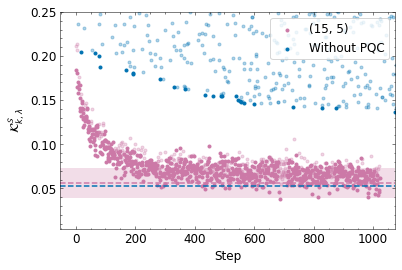

In [13]:
%matplotlib inline

"""
_tmp_path = DATA_DIR / 'Classical'
_tmp_path.mkdir(exist_ok=True)
pqasvm.save(_tmp_path / 'qasvm')
storage.save(_tmp_path / 'storage')
"""
import dill
#with open(DATA_DIR / 'Classical' / 'storage', 'rb') as f:
with open(DATA_DIR / 'Classical' / 'storage_blocking', 'rb') as f:
    storage = dill.load(f)
#with open(DATA_DIR / 'Classical' / 'qasvm', 'rb') as f:
with open(DATA_DIR / 'Classical' / 'qasvm_blocking', 'rb') as f:
    pqasvm = dill.load(f)
last_cost = storage.last_cost_avg(16, ignore_rejected=True)


# with open(DATA_DIR / 'Samples/Circuit #15/layer=4/4/storage', 'rb') as f:
#with open(DATA_DIR / 'Samples/Circuit #15/layer=5/1/storage', 'rb') as f:
with open(DATA_DIR / '(15, 5)-1024/storage', 'rb') as f:
    qasvm_storage = dill.load(f)
    
# df1 = storage.data.iloc[:len(qasvm_storage.data)]
df1 = qasvm_storage.data
df2 = storage.data
plt.scatter(df1.loc[df1['Accepted']==True]['Step'], df1.loc[df1['Accepted']==True]['Cost'], marker='.', c=c15_yb, label='(15, 5)')
#plt.scatter(range(len(df1.loc[df1['Accepted']==True])), df1.loc[df1['Accepted']==True]['Cost'], marker='.', c=color1, label='QASVM')
plt.scatter(df1.loc[df1['Accepted']==False]['Step'], df1.loc[df1['Accepted']==False]['Cost'], marker='.', alpha=0.3, c=c15_yb)
plt.scatter(df2.loc[df2['Accepted']==True]['Step'], df2.loc[df2['Accepted']==True]['Cost'], marker='.', c=psd_yb, label='Without PQC')
#plt.scatter(range(len(df2.loc[df2['Accepted']==True])), df2.loc[df2['Accepted']==True]['Cost'], marker='.', c=color2, label='Without PQC')
plt.scatter(df2.loc[df2['Accepted']==False]['Step'], df2.loc[df2['Accepted']==False]['Cost'], marker='.', alpha=0.3, c=psd_yb)
plt.axhline(last_cost, 0, 1, color=psd_yb, linestyle='--')
plt.axhline(qasvm_storage.last_cost_avg(16, ignore_rejected=True), 0, 1, color=c15_yb, linestyle='--')
plt.axhspan(ymin=qasvm_storage.last_cost_avg(16, ignore_rejected=True)-2*qasvm_storage.last_cost_std(16, ignore_rejected=True),
            ymax=qasvm_storage.last_cost_avg(16, ignore_rejected=True)+2*qasvm_storage.last_cost_std(16, ignore_rejected=True),
            xmin=0, xmax=1, facecolor=c15_yb, alpha=0.25)
plt.ylim([None, 0.25])
plt.xlim([-len(df1)*.05, len(df1)*1.05])
plt.xlabel('Step')
plt.ylabel(OBJ_FUNC)
plt.legend(loc='upper right')
plt.savefig('./figs/spsa_progress_blocking.png')
plt.show()

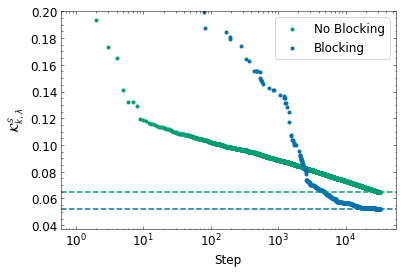

In [14]:
import dill
with open(DATA_DIR / 'Classical' / 'storage', 'rb') as f:
    not_blocking_storage = dill.load(f)

with open(DATA_DIR / 'Classical' / 'storage_blocking', 'rb') as f:
    yes_blocking_storage = dill.load(f)
    
df1 = not_blocking_storage.data
df2 = yes_blocking_storage.data
plt.scatter(df1.loc[df1['Accepted']==True]['Step'], df1.loc[df1['Accepted']==True]['Cost'], marker='.', c=psd_nb, label='No Blocking')
#plt.scatter(df1.loc[df1['Accepted']==False]['Step'], df1.loc[df1['Accepted']==False]['Cost'], marker='.', alpha=0.3, c=color1)
plt.scatter(df2.loc[df2['Accepted']==True]['Step'], df2.loc[df2['Accepted']==True]['Cost'], marker='.', c=psd_yb, label='Blocking')
#plt.scatter(df2.loc[df2['Accepted']==False]['Step'], df2.loc[df2['Accepted']==False]['Cost'], marker='.', alpha=0.3, c=color2)
plt.axhline(not_blocking_storage.last_cost_avg(16, ignore_rejected=True), 0, 1, color=psd_nb, linestyle='--')
plt.axhline(yes_blocking_storage.last_cost_avg(16, ignore_rejected=True), 0, 1, color=psd_yb, linestyle='--')
plt.xlabel('Step')
plt.ylabel(OBJ_FUNC)
plt.ylim([None, 0.2])
plt.xscale('log')
plt.legend(loc='upper right')
plt.savefig('./figs/si_spsa_blocking_effect.png')
plt.show()

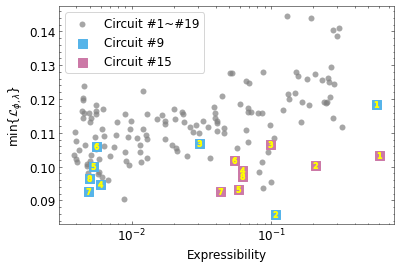

In [35]:
%matplotlib inline
cid=9
not15 = min_select_result.loc[min_select_result['circuit_id']!=cid]
yes15 = min_select_result.loc[min_select_result['circuit_id']==cid]
plt.scatter(not15['expr'], not15['last_cost_avg'], marker='o', color='grey', alpha=0.7, linewidth=0, label='Circuit #1~#19')#yerr=std_result['num_iter'])
with plt.rc_context({'lines.markersize': 1.5*plt.rcParams['lines.markersize']}):
    plt.scatter(yes15['expr'], yes15['last_cost_avg'], marker='s', color=c2, label=f'Circuit #{cid}')
for l in range(1, 9):
    plt.scatter(yes15.loc[yes15['layer']==l]['expr'], yes15.loc[yes15['layer']==l]['last_cost_avg'], marker=f'${l}$', color='yellow')#yerr=std_result['num_iter'])

cid=15
not15 = min_select_result.loc[min_select_result['circuit_id']!=cid]
yes15 = min_select_result.loc[min_select_result['circuit_id']==cid]
with plt.rc_context({'lines.markersize': 1.5*plt.rcParams['lines.markersize']}):
    plt.scatter(yes15['expr'], yes15['last_cost_avg'], marker='s', color=c3, label=f'Circuit #{cid}')
for l in range(1, 9):
    plt.scatter(yes15.loc[yes15['layer']==l]['expr'], yes15.loc[yes15['layer']==l]['last_cost_avg'], marker=f'${l}$', color='yellow')#yerr=std_result['num_iter'])
#plt.axhline(y=last_cost, linestyle='--', label='Without PQC', color=c1)
plt.xscale('log')
plt.xlabel('Expressibility')
plt.ylabel('min{' + OBJ_FUNC + '}')
plt.legend()
# plt.savefig('./figs/expr_vs_cost.png')
plt.show()

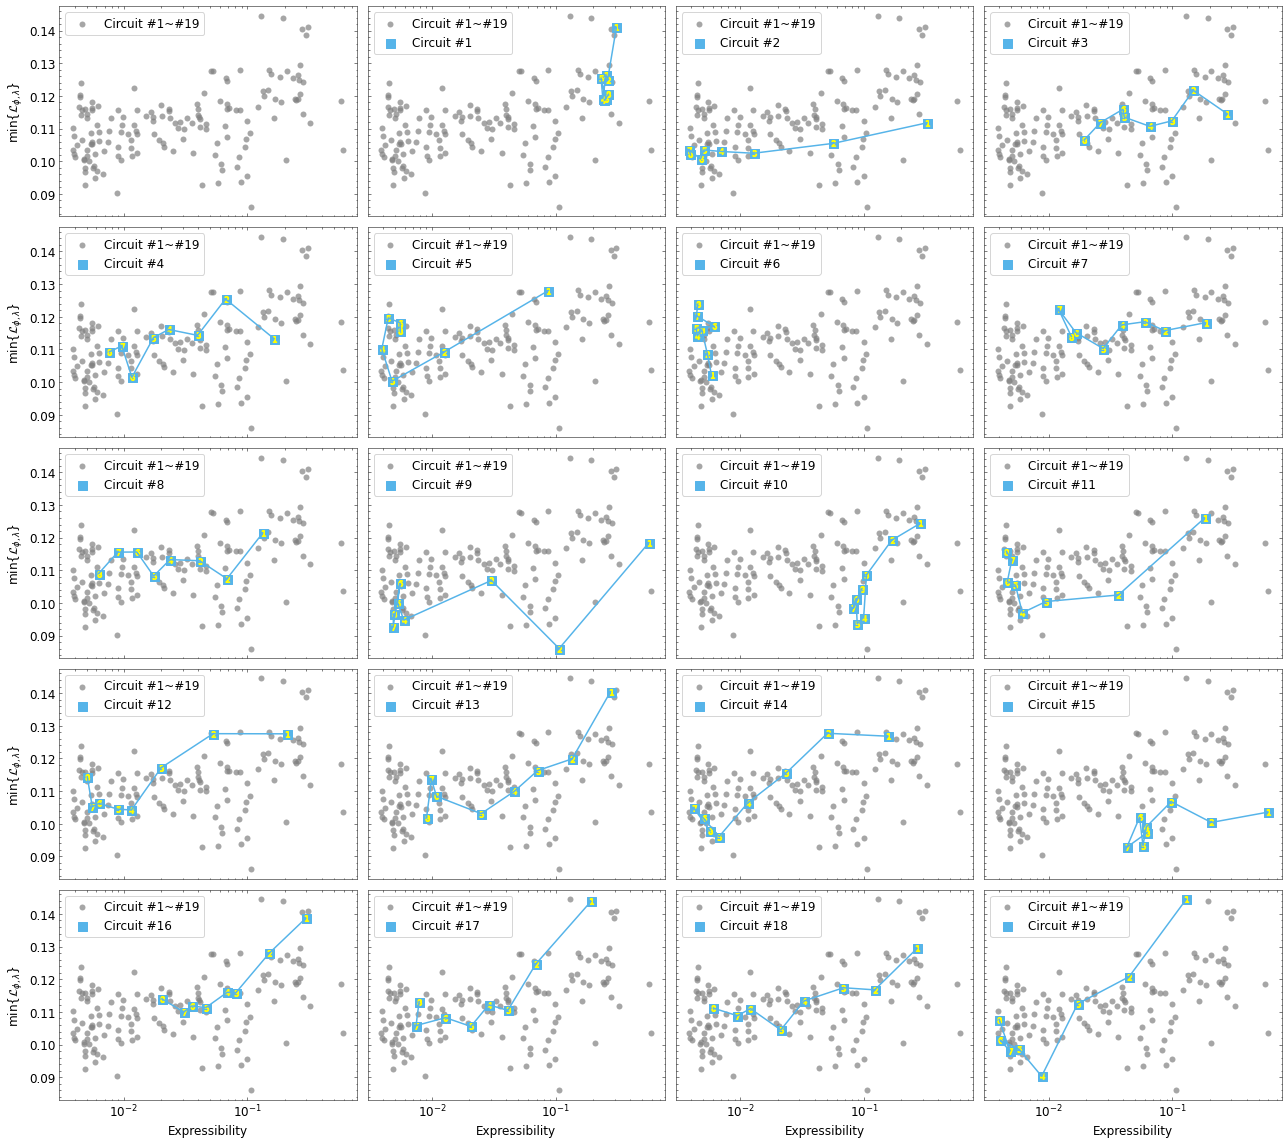

In [36]:
%matplotlib inline
default_fig_size = plt.rcParams['figure.figsize']
fig, axes = plt.subplots(5, 4, figsize=(3*default_fig_size[0], 4*default_fig_size[1]), squeeze=True, sharex=True, sharey=True)
for cid in list(range(1, 21)):
    ax = axes.flatten()[cid%20]
    not15 = min_select_result.loc[min_select_result['circuit_id']!=cid]
    yes15 = min_select_result.loc[min_select_result['circuit_id']==cid]
    ax.scatter(not15['expr'], not15['last_cost_avg'], marker='o', color='grey', alpha=0.7, linewidth=0, label='Circuit #1~#19')#yerr=std_result['num_iter'])
    ax.plot(yes15['expr'], yes15['last_cost_avg'], marker='', color=c2)
    if cid<20:
        with plt.rc_context({'lines.markersize': 1.5*plt.rcParams['lines.markersize']}):
            ax.scatter(yes15['expr'], yes15['last_cost_avg'], marker='s', color=c2, label=f'Circuit #{cid}')
    for l in range(1, 9):
        ax.scatter(yes15.loc[yes15['layer']==l]['expr'], yes15.loc[yes15['layer']==l]['last_cost_avg'], marker=f'${l}$', color='yellow')#yerr=std_result['num_iter'])
    #ax.axhline(y=last_cost, linestyle='--', label='Without PQC', color=c1)
    ax.set_xscale('log')
    if cid%20 in [0, 4, 8, 12, 16]:
        ax.set_ylabel('min{' + OBJ_FUNC + '}')
    if cid%20 in [16, 17, 18, 19]:
        ax.set_xlabel('Expressibility')
    ax.legend()
plt.tight_layout()
# plt.savefig('./figs/si_expr_vs_cost.png')
plt.show()

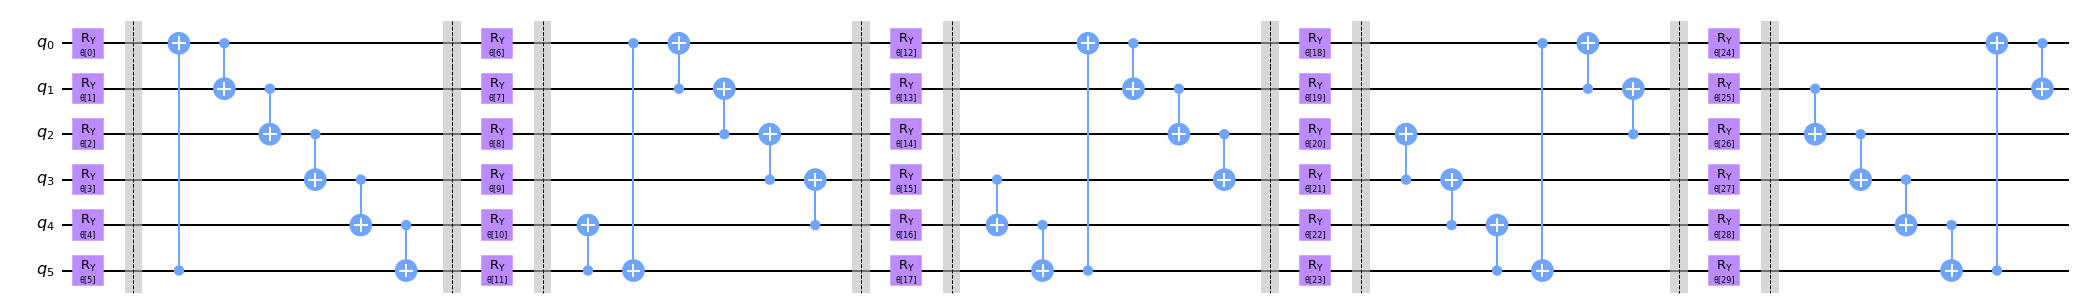

In [17]:
from classifiers.quantum.ansatz import Circuit15, Circuit16

fig = Circuit15(6, reps=5, insert_barriers=True).decompose().draw('mpl', fold=-1)
fig.savefig('./figs/circuit15.png')

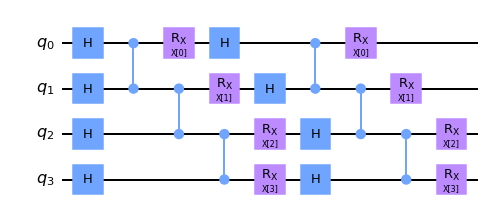

In [18]:
with open(DATA_DIR / '(15, 5)-1024/qasvm', 'rb') as f:
    qasvm = dill.load(f)
fig = qasvm.feature_map.decompose().draw('mpl', fold=-1)
fig.savefig('./figs/Cid19FeatureMap.png')

In [19]:
"""
from classifiers.convex.svm import BinarySVM
from qiskit_machine_learning.kernels import QuantumKernel

quantum_kernel = QuantumKernel(qasvm.feature_map, enforce_psd=False, quantum_instance=qasvm.quantum_instance)
def my_kernel(x, y):
    return (np.abs(quantum_kernel.evaluate([x], [y]))**2).item()
svm = BinarySVM(kernel=my_kernel, mutation='REDUCED_QASVM', k=qasvm.lamda, C=None)
svm.fit(qasvm.data, qasvm.label)
svm_f = svm.f(Xt)
svm_cost = svm.result['dual objective']
svm_acc = sum(np.where(svm_f*(2*yt-1)>0, 1, 0))/len(yt)
pqasvm_f = pqasvm.f(Xt)
pqasvm_acc = sum(np.where(pqasvm_f*(2*yt-1)>0, 1, 0))/len(yt)
"""
import dill
import json

with open(DATA_DIR / 'Classical/svm', 'rb') as f:
    svm = dill.load(f)
    
with open(DATA_DIR / 'Classical/svm_result.json', 'r') as f:
    svm_acc = json.load(f)['accuracy']
    
with open(DATA_DIR / 'Classical/pqasvm_blocing_result.json', 'r') as f:
    pqasvm_acc = json.load(f)['accuracy']
    
with open(DATA_DIR / '(15, 5)-1024/full_result.json', 'r') as f: 
    d = json.load(f)
    qasvm_f = d['f']
    qasvm_acc = d['accuracy']

In [20]:

print('\t svm\t pqasvm\t qasvm')
print('accuracy {:.2f}\t {:.2f}\t {:.2f}'.format(svm_acc, pqasvm_acc, qasvm_acc))
print('cost\t {:.2f}\t {:.2f}\t {:.2f}'.format(svm.result['dual objective'], last_cost, qasvm_storage.last_cost_avg(16, ignore_rejected=True)))
print('epochs\t {:}\t {:}\t {:}'.format(svm.result['iterations'], len(storage.data), len(qasvm_storage.data)))

	 svm	 pqasvm	 qasvm
accuracy 0.96	 0.93	 0.93
cost	 0.02	 0.05	 0.06
epochs	 10	 32767	 1023
